In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
titanic = pd.read_csv('titanic.csv')

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic=titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [8]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [11]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [13]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
for col in ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch', 'Fare']:
    print(titanic['Survived'].groupby(titanic[col]).mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64
Fare
0.0000      0.066667
4.0125      0.000000
5.0000      0.000000
6.2375      0.000000
6.4375      0.000000
              ...   
227.5250    0.750000
247.5208    0.500000
262.3750    1.000000
263.0000    0.500000
512.3292    1.000000
Name: Survived, Length: 248, dtype: float64


In [15]:
titanic['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [17]:
x = titanic['Fare']
# titanic['index1'] = titanic.index
y = titanic.index

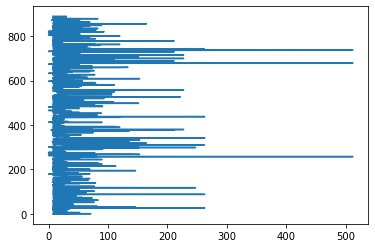

In [23]:
plt.plot(x,y)

In [31]:
titanic['Fare_range'] = pd.cut(titanic['Fare'], [0,30,80,500], labels=['0-30','30-80','80 and more'])
titanic['Fare_range'].value_counts()

0-30           642
30-80          160
80 and more     71
Name: Fare_range, dtype: int64

In [32]:
titanic['Survived'].groupby(titanic['Fare_range']).mean()

Fare_range
0-30           0.319315
30-80          0.493750
80 and more    0.760563
Name: Survived, dtype: float64

In [35]:
titanic = pd.get_dummies(titanic, columns=['Embarked', 'Sex', 'Pclass'], drop_first=False)
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Fare_range,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0-30,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,30-80,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0-30,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,30-80,0,0,1,1,0,1,0,0
4,0,35.0,0,0,8.0500,0-30,0,0,1,0,1,0,0,1


<AxesSubplot:>

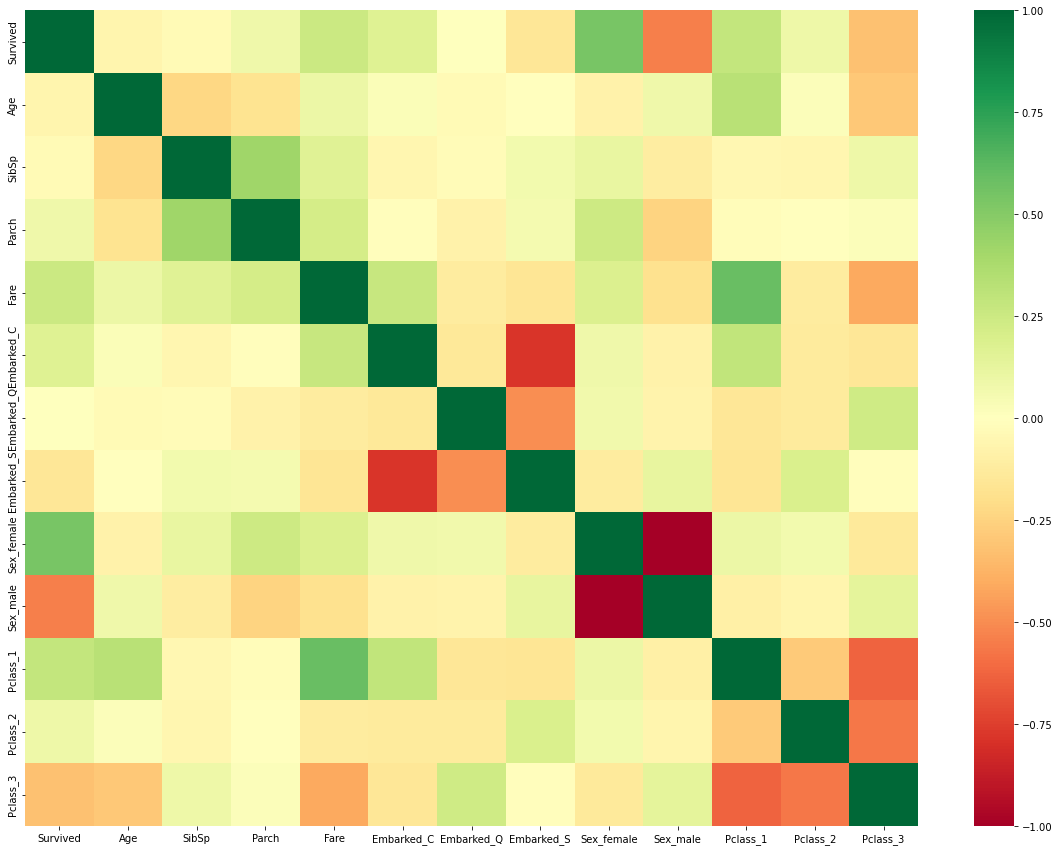

In [46]:
plt.figure(figsize = (20,15))
sns.heatmap(titanic.corr(),cmap = 'RdYlGn')

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

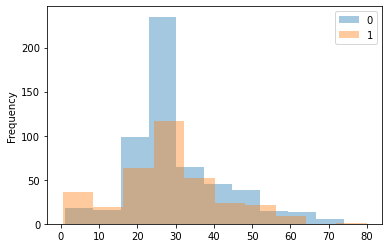

In [48]:
titanic.groupby('Survived').Age.plot(kind='hist', legend=True, alpha=0.4)